# Exploratory Data Analysis

In [68]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
sns.set_style("whitegrid")

In [69]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [70]:
df.shape

(891, 15)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [72]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
df.isnull().mean()

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [75]:
# alter the deck colummun with most ferqunet data
df['deck'] = SimpleImputer(strategy='most_frequent').fit_transform(df[['deck']]).ravel()
# alter the age colummnun with mean and median 
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df[['age']])
# it will replace the null values with mean values
df['age'] = imputer.transform(df[['age']])

In [76]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           0
embark_town    2
alive          0
alone          0
dtype: int64

In [77]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [78]:
df.duplicated().sum()

np.int64(108)

In [79]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.000000,0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


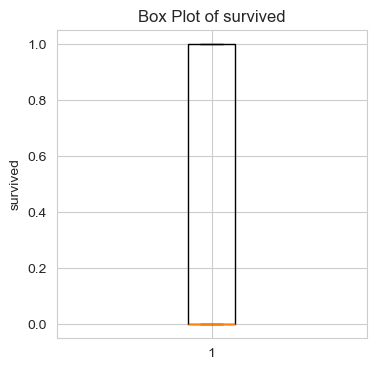

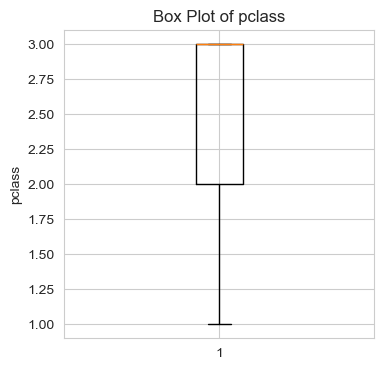

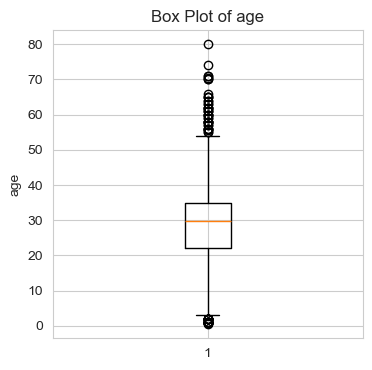

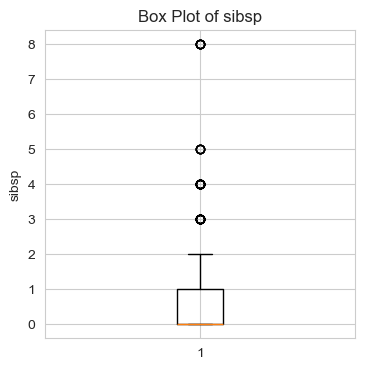

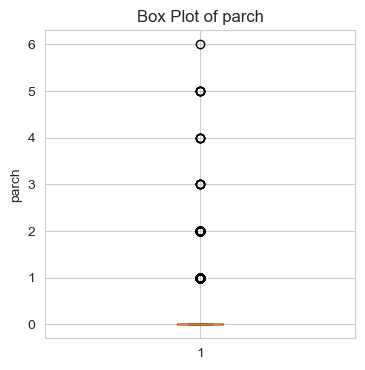

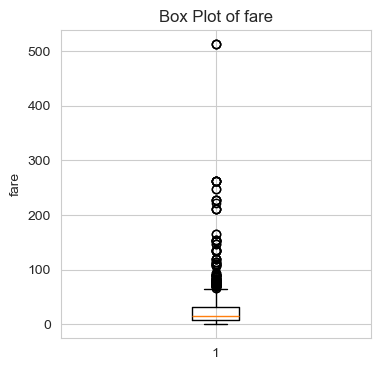

In [80]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])

# Loop through columns and plot individually
for col in num_cols.columns:
    plt.figure(figsize=(4, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [81]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck             object
embark_town      object
alive            object
alone              bool
dtype: object

In [82]:
# change the age datatype if float change to int64
df['age']=df['age'].astype('int64')

In [83]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,29,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [84]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [85]:
df.groupby('survived')['alone'].value_counts()

survived  alone
0         True     374
          False    175
1         False    179
          True     163
Name: count, dtype: int64

In [86]:
df.groupby('survived')['class'].value_counts()

survived  class 
0         Third     372
          Second     97
          First      80
1         First     136
          Third     119
          Second     87
Name: count, dtype: int64

In [87]:
df['age'].value_counts()

age
29    197
24     31
22     27
28     27
30     27
     ... 
66      1
12      1
53      1
80      1
74      1
Name: count, Length: 71, dtype: int64

In [88]:
count = 0
for i in df['age']:
    if 20 <= i < 30:
        count += 1


In [89]:
print("Younger ages on the ship are : " , count)

Younger ages on the ship are :  397


In [90]:
df.groupby('survived')['age'].value_counts()

survived  age
0         29     137
          28      20
          21      19
          18      17
          25      17
                ... 
1         43       1
          47       1
          53       1
          55       1
          80       1
Name: count, Length: 124, dtype: int64

In [91]:
df.groupby('survived')['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64